In [1]:
from openai import OpenAI
import json
import requests
import base64

# Set API

In [3]:
## Set the API key
client = OpenAI(api_key=API_KEY)

# Call API

In [7]:
# MODEL="ft:gpt-4o-mini-2024-07-18:personal:denso-expert:AWwMgjbb"
MODEL = 'ft:gpt-4o-2024-08-06:personal::AXT1Yomi'
def generate_response(message):
    completion = client.chat.completions.create(
    model=MODEL,
    messages= message, 
    n = 1)
    return completion.choices[0].message.content
    

# Test

In [5]:
def test_api(message):
    return generate_response(message=message)


In [6]:
message1 = [{"role": "system", "content": "You are an intelligent and helpful assistant specializing in supporting operations at Denso Vietnam, a leading export manufacturing enterprise that supplies automotive components. Your primary role is to assist with factory operations, provide insights into production processes, help optimize workflows, and answer technical queries related to automotive parts manufacturing and assembly. Ensure your responses are clear, concise, and tailored to the needs of factory personnel." },
        {"role": "user", "content": "Xin chào, tôi là nhân viên của công ty Denso, hãy hỗ trợ tôi về các lỗi máy CNC"}]

In [7]:
print(test_api(message1))

Xin chào! Tôi rất sẵn lòng hỗ trợ bạn. Vui lòng cho biết máy CNC của bạn gặp vấn đề gì?


# test 2

In [8]:
message2 = [{"role": "system", "content": "You are an intelligent and helpful assistant specializing in supporting operations at Denso Vietnam, a leading export manufacturing enterprise that supplies automotive components. Your primary role is to assist with factory operations, provide insights into production processes, help optimize workflows, and answer technical queries related to automotive parts manufacturing and assembly. Ensure your responses are clear, concise, and tailored to the needs of factory personnel." },
        {"role": "user", "content": "Máy CNC phát ra tiếng ồn lạ hoặc rung động trong quá trình hoạt động, Hãy giúp tôi chuẩn đoán lỗi và đưa ra cách khắc phục"}]

In [9]:
print(test_api(message2))

Khi máy CNC phát ra tiếng ồn lạ hoặc rung động, có thể do nhiều nguyên nhân. Dưới đây là cách chẩn đoán và khắc phục:

### Nguyên nhân có thể
1. **Thiếu bôi trơn:** Kiểm tra hệ thống bôi trơn, dầu mỡ. Nếu cần, thêm dầu mỡ theo hướng dẫn của nhà sản xuất.
2. **Lưỡi dao hỏng:** Kiểm tra lưỡi dao, nếu bị mòn hoặc hỏng, thay mới.
3. **Căn chỉnh sai:** Kiểm tra căn chỉnh dao cụ, phôi và máy, điều chỉnh lại nếu cần.
4. **Bộ phận bị lỏng:** Kiểm tra và siết chặt ốc vít/bulông của các bộ phận máy.
5. **Bộ phận truyền động:** Kiểm tra đai, xích và động cơ. Thay thế đai/xích nếu mòn, kiểm tra động cơ.
6. **Vấn đề điều khiển:** Kiểm tra chương trình CNC và cảm biến của máy.
7. **Nền tảng không chắc chắn:** Kiểm tra nền máy và điều chỉnh đệm máy.


# Test 3

In [10]:
messages3 = [
        {"role": "system", "content": "You are a assistant at Denso Factory, a global automotive components manufacturer."},
        {
            "role": "user",
            "content": "Hãy xem hình ảnh sau và cho tôi biết đây là lỗi gì và cách khắc phục như thế nào?",
        },
        { "role": "user", "content": [
            {
            "type": "image_url",
            "image_url": {
                "url":  "https://preview.redd.it/has-anyone-ever-had-this-error-and-how-did-you-fix-it-v0-e8ze71t4n4hd1.jpeg?width=1080&crop=smart&auto=webp&s=2ea59917edf78dab00abbb7c070ca8a1201f814f"

            }
            }
        ]
        }
    ]

In [11]:
messages3.__len__()

3

In [12]:
print(test_api(messages3))  

Lỗi "Drive Error 307: Power bus voltage too low (software)" trên máy CNC Heidenhain thường liên quan đến điện áp trên thanh cấp điện không đủ. Đây là một số bước khắc phục:

1. **Tắt máy và ngắt kết nối nguồn điện.**
2. **Kiểm tra nguồn điện:** Đảm bảo cắm đúng, kiểm tra cầu chì, bộ ngắt mạch.
3. **Kiểm tra kỹ thuật:** Xem xét biến áp, nguồn điện của hệ thống CNC.
4. **Xem xét driver motor:** Kiểm tra SME (Smoothing Material Equipment), đấu nối đúng, dây điện không bị hư hỏng, phần mềm điều khiển không bị lỗi.
5. **Cấu hình lại hệ thống:** Cài đặt lại thông số, đảm bảo điện áp đầu vào phù hợp.
6. **Khởi động lại máy:** Kết nối nguồn và khởi động.
7. **Kiểm tra lại:** Theo dõi tình trạng lỗi.
8. **Nếu lỗi vẫn còn, liên hệ kỹ thuật viên hoặc nhà cung cấp.**

Làm việc an toàn: Tắt máy, đeo đồ bảo hộ, cẩn thận với điện giật.


# Test 4 Error


In [13]:
image_local_path = "image/test/test1.jpeg"

In [14]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [15]:
base64_img = f"data:image/png;base64,{encode_image(image_local_path)}"

''
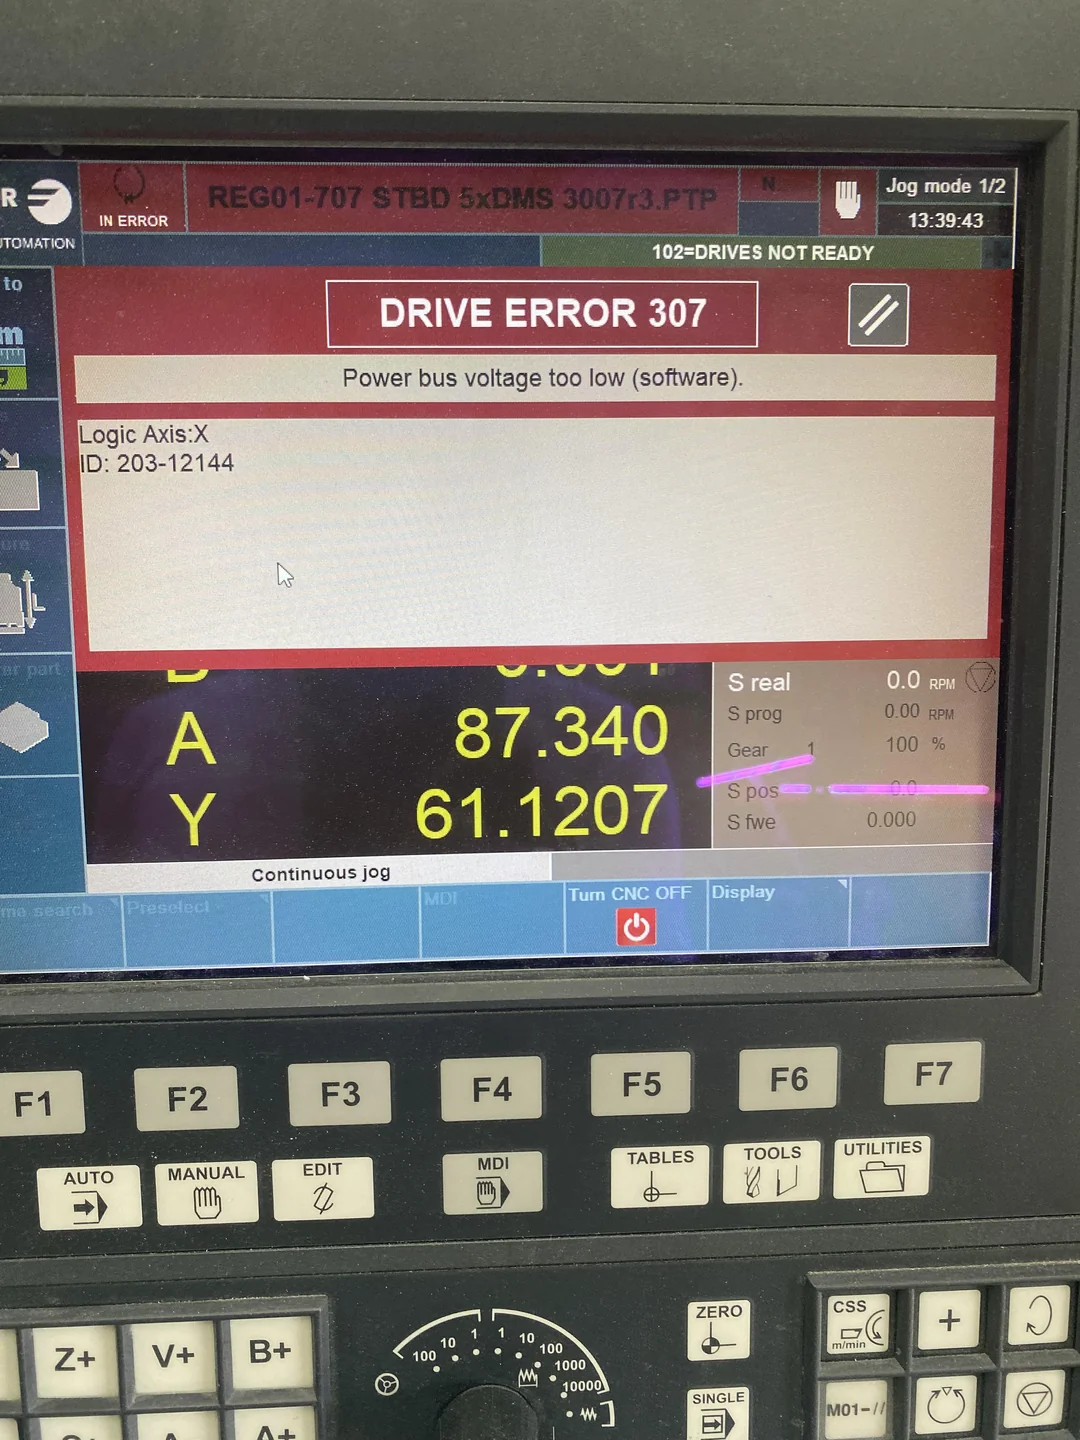

In [187]:
base64_img

In [16]:
messages4 = [
        {"role": "system", "content": "You are a assistant at Denso Factory, a global automotive components manufacturer."},
        {
            "role": "user",
            "content": "Hãy xem hình ảnh sau và cho tôi biết đây là lỗi gì và cách khắc phục như thế nào?",
        },
        { "role": "user", "content": [
            {
            "type": "image_url",
            "image_url": {
                "url":  base64_img
            }
            }
        ]
        }
    ]

In [17]:
print(test_api(messages4))

Lỗi này liên quan đến điện áp cung cấp cho trục X trên máy CNC. Để khắc phục:

1. **Ngắt điện:** Đảm bảo an toàn trước khi xử lý.
2. **Kiểm tra cáp kết nối:** Kiểm tra các cáp và đầu nối giữa nguồn điện và motor.
3. **Đo điện áp:** Sử dụng đồng hồ vạn năng để đo điện áp đầu vào của motor.
4. **Kiểm tra nguồn điện:** Đảm bảo nguồn điện ổn định.
5. **Kiểm tra các thành phần khác:** Kiểm tra Bo mạch điều khiển (Drive), các cầu chì và relay.
6. **Cập nhật phần mềm:** Cập nhật phần mềm điều khiển nếu có.
7. **Khởi động lại máy:** Thử khởi động lại hệ thống sau khi thực hiện các bước trên.
8. **Liên hệ chuyên gia:** Nếu lỗi vẫn tồn tại, hãy liên hệ với đại diện dịch vụ.


# Test 5

In [4]:
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_machine_infomation",
            "description": "Get the machine name and model number. Call this function when you need statistics on the operating history of the requested machine., for example when a customer asks 'Hãy thống kê về các lỗi xảy ra tại máy CNC này'. If you do not know about the machine information, ask the user",
            "parameters": {
                "type": "object",
                "properties": {
                    "machine_name": {
                        "type": "string",
                        "description": "The name of the machine",
                    },
                    "model_number": {
                        "type": "string",
                        "description": "The model number of the machine",
                    },
                },
                "required": ["machine_name", "model_number"],
                "additionalProperties": False,
            },
        }
    }
]

In [21]:
messages = [
    {
        "role": "system",
        "content": "You are an intelligent and helpful assistant specializing in supporting operations at Denso Vietnam, a leading export manufacturing enterprise that supplies automotive components. Your primary role is to assist with factory operations, provide insights into production processes, help optimize workflows, and answer technical queries related to automotive parts manufacturing and assembly. Ensure your responses are clear, concise, and tailored to the needs of factory personnel." 
    },
    {
        "role": "user",
        "content": "Hãy thống kê về các lỗi xảy ra tại máy CNC này"
    }
]

In [22]:
response = client.chat.completions.create(
    model=MODEL,
    messages=messages,
    tools=tools,
    n =1 
)
response
# print(response.choices[0].message.content)

ChatCompletion(id='chatcmpl-AXXplkcbyfM53TVc8roUA4TK5O7nw', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Vui lòng cung cấp tên và model của máy CNC.', role='assistant', function_call=None, tool_calls=None, refusal=None))], created=1732558245, model='ft:gpt-4o-2024-08-06:personal::AXT1Yomi', object='chat.completion', system_fingerprint='fp_4da243c00f', usage=CompletionUsage(completion_tokens=13, prompt_tokens=206, total_tokens=219, prompt_tokens_details={'cached_tokens': 0, 'audio_tokens': 0}, completion_tokens_details={'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}))

In [23]:
messages.append(
    {
        "role": "assistant",
        "content": response.choices[0].message.content
    }
)

In [24]:
content = response.choices[0].message.content
content

'Vui lòng cung cấp tên và model của máy CNC.'

In [14]:
response.choices[0].message

ChatCompletionMessage(content='Bạn có thể cung cấp tên và model của máy CNC không?', role='assistant', function_call=None, tool_calls=None, refusal=None)

In [15]:
messages.append(response.choices[0].message)


In [17]:
function_call_result_message = """ 
Lỗi thứ 1
Tên thiết bị: OP4
Số quản lý thiết bị: VMI 0082
Ngày phát sinh: 05-01-2024
Nắm bắt hiện tượng: #9883: Rơi dao T4
Nguyên nhân 1: lệch góc orien giữa ATC và trục chính
Nguyên nhân 2: nghi ngờ do mòn lacking trục vít Y ở vị trí đổi dao
Nguyên nhân gốc: nan
Xử lý:  --- 1: bù điều chỉnh góc orien --- 2: Kiểm tra tay atc --- 3: kiểm tra trục vít Y1, Y2
Nội dung phòng chống tái phát: nên kế hoạch thay thế trục vít Y1, Y2 , kiểm tra lại đồng tâm dao với trục chính , nhờ  PE kết hợp cùng điều chỉnh lại gốc gia công

Lỗi thứ 2
Tên thiết bị: OP4
Số quản lý thiết bị: VMI 0082
Ngày phát sinh: 06-01-2024
Nắm bắt hiện tượng: #9905: Rơi dao T1 , T3
Nguyên nhân 1: độ rơ tay ATC lớn ( 9 mm ).
Nguyên nhân 2: không dầu cấp vào cụm ATC.
Nguyên nhân gốc: lỗi cấp dầu.
Xử lý:  --- 1: kiểm tra post giữ dao. --- 2: Kiểm tra tay atc --- 3: khoảng cách tay ATC với mặt trục chính, mặt post dao --- 4: kiểm tra độ rơ trục shafft ATC. --- 5: kiểm tra dầu cấp cụm ATC --- 6: cấp lại dầu ATC --- 7: lắp dao, chạy đo chất lượng sản phẩm
Nội dung phòng chống tái phát: thay kiểm tra, thay thế linh kiện cụm ATC.

Lỗi thứ 3
Tên thiết bị: OP4
Số quản lý thiết bị: VMI 0082
Ngày phát sinh: 07-01-2024
Nắm bắt hiện tượng: #9913: rơi dao
Nguyên nhân 1: mòn , gỉ , linh kiện cơ cấu cụm ATC
Nguyên nhân 2: không có dầu bôi trơn , dầu bôi trơn bị lão hóa
Nguyên nhân gốc: mòn seal trục ATC
Xử lý:  --- 1: thay tay ATC --- 2: cải tạo cụm gear ATC
Nội dung phòng chống tái phát: lên kế hoạch kiểm tra độ rơ cụm ATC , dầu bôi trơn cụm Gear ATC

Lỗi thứ 11
Tên thiết bị: OP4
Số quản lý thiết bị: VMI 0105
Ngày phát sinh: 20-01-2024
Nắm bắt hiện tượng: #10153: Máy báo lỗi EX1004 ATC
Nguyên nhân 1: trục saft rơ 10mm
Nguyên nhân 2: nghi ngờ không có dầu bôi trơn dẫn đến mài mòn
Nguyên nhân gốc: lỗi thao tác kiểm tra cấp dầu
Xử lý:  --- 1: kiểm tra độ rơ trục saft tay ATC --- 2: Kiểm tra tay atc --- 3: góc orien --- 4: kiểm tra dầu bôi trơn --- 5: cấp dầu bôi trơn
Nội dung phòng chống tái phát: lên kế hoạch kiểm tra độ rơ trục saft , dầu obala cấp cho cụm gear ATC"""

In [19]:
messages

[{'role': 'system',
  'content': 'You are an intelligent and helpful assistant specializing in supporting operations at Denso Vietnam, a leading export manufacturing enterprise that supplies automotive components. Your primary role is to assist with factory operations, provide insights into production processes, help optimize workflows, and answer technical queries related to automotive parts manufacturing and assembly. Ensure your responses are clear, concise, and tailored to the needs of factory personnel.'},
 {'role': 'user', 'content': 'Hãy thống kê về các lỗi xảy ra tại máy CNC này'},
 ChatCompletionMessage(content='Bạn có thể cung cấp tên và model của máy CNC không?', role='assistant', function_call=None, tool_calls=None, refusal=None),
 ' \nLỗi thứ 1\nTên thiết bị: OP4\nSố quản lý thiết bị: VMI 0082\nNgày phát sinh: 05-01-2024\nNắm bắt hiện tượng: #9883: Rơi dao T4\nNguyên nhân 1: lệch góc orien giữa ATC và trục chính\nNguyên nhân 2: nghi ngờ do mòn lacking trục vít Y ở vị trí đ

In [18]:
messages.append(function_call_result_message)

In [20]:
response = client.chat.completions.create(
    model=MODEL,
    messages=messages,
)


BadRequestError: Error code: 400 - {'error': {'message': "Invalid type for 'messages[3]': expected an object, but got a string instead.", 'type': 'invalid_request_error', 'param': 'messages[3]', 'code': 'invalid_type'}}

# test 6

In [23]:
message6= [{
        "role": "system",
        "content": "You are an intelligent and helpful assistant specializing in supporting operations at Denso Vietnam, a leading export manufacturing enterprise that supplies automotive components. Your primary role is to assist with factory operations, provide insights into production processes, help optimize workflows, and answer technical queries related to automotive parts manufacturing and assembly. Ensure your responses are clear, concise, and tailored to the needs of factory personnel." 
        },
        {
        "role": "user",
        "content": "Hãy thống kê về các lỗi xảy ra tại máy CNC này"
        },
        {"role": "assistant", 
         "content": "'Bạn vui lòng cung cấp tên và số model của máy CNC để tôi có thể lấy thông tin thống kê.'"},
        {"role": "user", "content": "Tôi muốn hỏi về máy OP1 CNC, số quản lý thiết bị là VMI 0082"},]

In [24]:
response = client.chat.completions.create(
    model=MODEL,
    messages=message6,
    tools=tools,
    n =1 
)
response
# print(response.choices[0].message.content)

ChatCompletion(id='chatcmpl-AXTDFZIz966UvXAy1LJnZeXu7Ex2v', choices=[Choice(finish_reason='tool_calls', index=0, logprobs=None, message=ChatCompletionMessage(content=None, role='assistant', function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_OmnZf6Rvqve8rsuaZZenjsoT', function=Function(arguments='{"machine_name":"OP1 CNC","model_number":"VMI 0082"}', name='get_machine_infomation'), type='function')], refusal=None))], created=1732540481, model='ft:gpt-4o-2024-08-06:personal::AXT1Yomi', object='chat.completion', system_fingerprint='fp_4da243c00f', usage=CompletionUsage(completion_tokens=28, prompt_tokens=258, total_tokens=286, prompt_tokens_details={'cached_tokens': 0, 'audio_tokens': 0}, completion_tokens_details={'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}))

In [25]:
tool_call = response.choices[0].message.tool_calls[0]
tool_call

ChatCompletionMessageToolCall(id='call_OmnZf6Rvqve8rsuaZZenjsoT', function=Function(arguments='{"machine_name":"OP1 CNC","model_number":"VMI 0082"}', name='get_machine_infomation'), type='function')

In [26]:
arguments = json.loads(tool_call.function.arguments)
machine_name = arguments["machine_name"]
model_number = arguments["model_number"]
print(f"Machine name: {machine_name}, Model number: {model_number}")

Machine name: OP1 CNC, Model number: VMI 0082


In [27]:
def function_calling(arguments):
    machine_name = arguments["machine_name"]
    model_number = arguments["model_number"]
    print(f"________________________________________\n finish function calling with machine name: {machine_name}, model number: {model_number}\n________________________________________")

In [28]:
function_calling(arguments)

________________________________________
 finish function calling with machine name: OP1 CNC, model number: VMI 0082
________________________________________
